# Грачев Дмитрий
# 18-ИВТ-2

# Вариант 6
# Задание:
1.	Изучить набор данных. Создать описание набора данных на русском языке. Описать признаки, используемые в наборе данных (включить полученные описания в отчёт).
2.	Удалите дубликаты строк в наборе данных; приведите размер набора данных до и после данной операции;
3.	Оцените сбалансированность данных по классам (постройте гистограмму). Используйте полученную информацию при выборе метрики оценки качества классификации (PR или ROC кривая)
4.	Выполните масштабирование количественных признаков; Постройте диаграммы BoxPlot для признаков до и после масштабирования. Выберите способ масштабирования (например, нормализацию или стандартизацию);
5.	Выполните замену категориальных признаков; выберите и обоснуйте способ замены;
6.	Оцените корреляцию между признаков и удалите те признаки, которые коррелируют с наибольшим числом других (удалять признаки нужно только для линейных методов классификации);
7.	Заполните пропущенные значения в данных;
8.	Решите поставленную задачу классификации в соответствии с заданием. При подборе параметров классификатора используйте метод GridSearchCV и перекрёстную проверку (изучите возможные для изменения параметры классификации). Определите схему построения многоклассового классификатора, используемую по умолчанию (опишите используемую схему кодирования, обоснуйте свой выбор). Постройте, если это возможно, многоклассовую классификацию на основе схем «один-против-всех» и «все-против-всех». Оцените точность классификации для каждой их схем. Постройте кривые PR и ROC (для каждого из классов должны быть построены отдельные кривые, а также кривые для микро и макроусреднения метрик качества). Для линейного классификатора используйте регуляризацию. 
9.	Сравните кривые для классификаторов, указанных в задании, сделайте выводы.

###### Набор данных: titanic
###### Классификаторы:
1. Классификатор K ближайших соседей (задаётся количество ближайших объектов)
2. Логический классификатор (бинарное решающее дерево)

# 1
###### Опишем признаки
pclass    - класс пассажира
survived  - выжил (1 - да, 0 - нет)
name      - имя пассажира
sex       - пол
age       - возраст
sibsp     - отношения братья-сёстры и муж-жена
parch     - отношения родители-дети
ticket    - номер билета
fare      - стоимость билета
cabin     - номер каюты
embarked  - порт посадки
boat      - номер шлюпки
body      - вероятно, номер трупа
home.dest - домашний регион

T.к. номер шлюпки и номер трупа непосредственно связаны с тем, выжил пассажир или нет, то эти признаки стоит исключить

Tакже я решил исключить имя, номер билета, номер каюты и домашний регион

In [1]:
import warnings

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.calibration import CalibratedClassifierCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, precision_recall_curve, average_precision_score, roc_curve, auc
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
%matplotlib inline
warnings.simplefilter('ignore')
label_encoder = LabelEncoder()
scaler = StandardScaler()
train_data = pd.read_csv('titanic3.csv', sep=';', decimal=',')
train_data.head()

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
0,1,1,"Allen, Miss. Elisabeth Walton",female,29.0000,0,0,24160,211.3375,B5,S,2,NaN,"St Louis, MO"
1,1,1,"Allison, Master. Hudson Trevor",male,0.9167,1,2,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON"
2,1,0,"Allison, Miss. Helen Loraine",female,2.0000,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"
3,1,0,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,1,2,113781,151.5500,C22 C26,S,NaN,135.0,"Montreal, PQ / Chesterville, ON"
4,1,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"


In [2]:
train_data = train_data.drop(columns='name')
train_data = train_data.drop(columns='cabin')
train_data = train_data.drop(columns='boat')
train_data = train_data.drop(columns='ticket')
train_data = train_data.drop(columns='body')
train_data = train_data.drop(columns='home.dest')
train_data.head()

,pclass,survived,sex,age,sibsp,parch,fare,embarked
0,1,1,female,29.0000,0,0,211.3375,S
1,1,1,male,0.9167,1,2,151.5500,S
2,1,0,female,2.0000,1,2,151.5500,S
3,1,0,male,30.0000,1,2,151.5500,S
4,1,0,female,25.0000,1,2,151.5500,S


In [3]:
train_data.nunique()

pclass        3
survived      2
sex           2
age          98
sibsp         7
parch         8
fare        281
embarked      3
dtype: int64

# 2

In [4]:
print('До удаление дубликатов: %d' % len(train_data))
train_data.drop_duplicates(keep="first", inplace=True)
print('После удаление дубликатов: %d' % len(train_data))

До удаление дубликатов: 1309
После удаление дубликатов: 1114


# 3

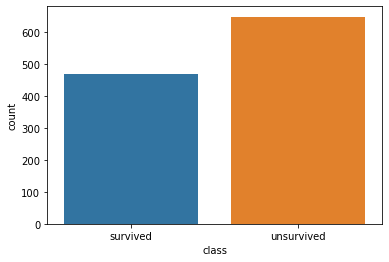

In [5]:
sns.barplot(data=pd.DataFrame({
    'count': [
        len(train_data.loc[train_data['survived'] == 1]),
        len(train_data.loc[train_data['survived'] == 0]),
    ],
    'class': [
        'survived',
        'unsurvived',
    ],
}), y='count', x='class')

Данные не сбалансированы
Целесообразно использовать ROC-кривую

# 4

Каждый количественный признак приведем к нулевому среднему и единичному среднеквадратичному отклонению

In [6]:
train_data.describe(include=[object])

,sex,embarked
count,1114,1112
unique,2,3
top,male,S
freq,684,780


In [7]:
train_data.describe()

,pclass,survived,age,sibsp,parch,fare
count,1114.000000,1114.000000,974.000000,1114.000000,1114.000000,1113.000000
mean,2.219928,0.419210,30.089237,0.515260,0.432675,36.672585
std,0.857878,0.493651,14.724365,0.954603,0.911862,55.055034
min,1.000000,0.000000,0.166700,0.000000,0.000000,0.000000
25%,1.000000,0.000000,21.000000,0.000000,0.000000,8.050000
50%,3.000000,0.000000,28.000000,0.000000,0.000000,16.100000
75%,3.000000,1.000000,39.000000,1.000000,1.000000,35.500000
max,3.000000,1.000000,80.000000,8.000000,9.000000,512.329200


In [8]:
cat_columns = [c for c in train_data.columns if train_data[c].dtype.name == 'object' or c == 'pclass' or c == 'survived']
num_columns = [c for c in train_data.columns if train_data[c].dtype.name != 'object' and c != 'pclass' and c != 'survived']
print(cat_columns)
print(num_columns)

['pclass', 'survived', 'sex', 'embarked']
['age', 'sibsp', 'parch', 'fare']


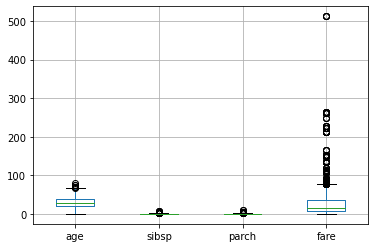

In [9]:
data_numerical = train_data[num_columns]
data_numerical.boxplot()

In [10]:

data_numerical = (data_numerical - data_numerical.mean()) / data_numerical.std()
data_numerical.describe()

,age,sibsp,parch,fare
count,9.740000e+02,1.114000e+03,1.114000e+03,1.113000e+03
mean,-5.836080e-17,1.913490e-17,6.378301e-18,-2.119499e-15
std,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00
min,-2.032178e+00,-5.397638e-01,-4.744963e-01,-6.661078e-01
25%,-6.172923e-01,-5.397638e-01,-4.744963e-01,-5.198904e-01
50%,-1.418898e-01,-5.397638e-01,-4.744963e-01,-3.736731e-01
75%,6.051713e-01,5.077918e-01,6.221611e-01,-2.129842e-02
max,3.389672e+00,7.840681e+00,9.395420e+00,8.639657e+00


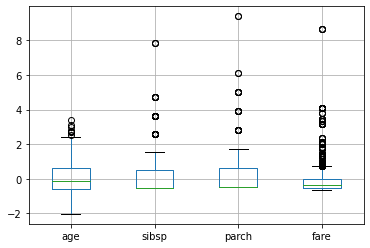

In [11]:
data_numerical.boxplot()

# 5
Разделим категориальные признаки на бинарные и небинарные, для бинарных заменим значения на 0 и 1, а небинарные обратим в группы бинарных, где 1 имеет только один признак из группы

In [12]:
binary_columns    = [c for c in cat_columns if len(train_data[c].unique()) == 2]
nonbinary_columns = [c for c in cat_columns if len(train_data[c].unique()) > 2]
print(binary_columns, nonbinary_columns)

['survived', 'sex'] ['pclass', 'embarked']


In [13]:
train_data.loc[train_data['sex'] == 'male', 'sex'] = 0
train_data.loc[train_data['sex'] == 'female', 'sex'] = 1
train_data.head()

,pclass,survived,sex,age,sibsp,parch,fare,embarked
0,1,1,1,29.0000,0,0,211.3375,S
1,1,1,0,0.9167,1,2,151.5500,S
2,1,0,1,2.0000,1,2,151.5500,S
3,1,0,0,30.0000,1,2,151.5500,S
4,1,0,1,25.0000,1,2,151.5500,S


In [14]:
data_nonbinary = pd.get_dummies(train_data[nonbinary_columns])
data_nonbinary.head()

,pclass,embarked_C,embarked_Q,embarked_S
0,1,0,0,1
1,1,0,0,1
2,1,0,0,1
3,1,0,0,1
4,1,0,0,1


Т.к. pclass расценивается как количественный признак, то я решил таким его и оставить, потому что классы пассажиров идут один за одним

In [15]:
train_data = pd.concat((data_numerical, train_data[binary_columns], data_nonbinary), axis=1)
train_data = pd.DataFrame(train_data, dtype=float)
print(train_data.shape)
print(train_data.columns)

(1114, 10)
Index(['age', 'sibsp', 'parch', 'fare', 'survived', 'sex', 'pclass',
       'embarked_C', 'embarked_Q', 'embarked_S'],
      dtype='object')


# 6

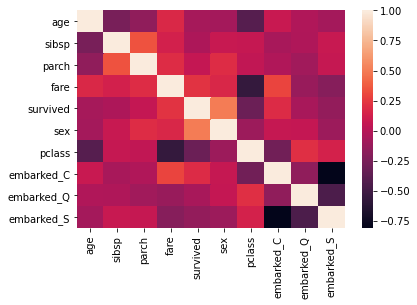

In [16]:
corr = train_data.corr()
sns.heatmap(corr)

# 7

In [17]:
train_data.count()

age            974
sibsp         1114
parch         1114
fare          1113
survived      1114
sex           1114
pclass        1114
embarked_C    1114
embarked_Q    1114
embarked_S    1114
dtype: int64

In [18]:
train_data = train_data.fillna(train_data.median(axis=0), axis=0)
train_data.count()

age           1114
sibsp         1114
parch         1114
fare          1114
survived      1114
sex           1114
pclass        1114
embarked_C    1114
embarked_Q    1114
embarked_S    1114
dtype: int64

# 8

In [19]:
data_X, data_Y = train_data.drop(columns='survived', axis=1).values, train_data['survived']
train_x, test_x, train_y, test_y = train_test_split(data_X, data_Y, test_size=0.3)

###### Классификатор K ближайших соседей (задаётся количество ближайших объектов)

In [20]:
knc = KNeighborsClassifier()

search = GridSearchCV(knc, {'n_neighbors': [x for x in range(1, 50)]})
search.fit(train_x, train_y)

k = search.best_estimator_.n_neighbors
best = search.best_score_
print('best: ', best, ', neighbors num: ', k, sep='')

knc = KNeighborsClassifier(n_neighbors=k)
knc.fit(train_x, train_y)
knc_predict = knc.predict(test_x)
print('Accuracy knn: %.5f' % accuracy_score(test_y, knc_predict))

best: 0.7715880893300249, neighbors num: 25
Accuracy knn: 0.73433


###### Логический классификатор (бинарное решающее дерево)

In [21]:
dtc = DecisionTreeClassifier()

search = GridSearchCV(dtc, {'max_depth': [x for x in range(1, 50)]})
search.fit(train_x, train_y)

n = search.best_estimator_.max_depth
best = search.best_score_
print('best: ', best, ', max depth: ', n, sep='')

dtc = DecisionTreeClassifier(max_depth=n)
dtc.fit(train_x, train_y)
dtc_predict = dtc.predict(test_x)
print('Accuracy knn: %.5f' % accuracy_score(test_y, dtc_predict))

best: 0.7831100082712986, max depth: 3
Accuracy knn: 0.77015


# 9

In [22]:
test_y_inversion = [1-y for y in test_y]

prob_knc = knc.predict_proba(test_x)

prob_dtc = dtc.predict_proba(test_x)

###### pr

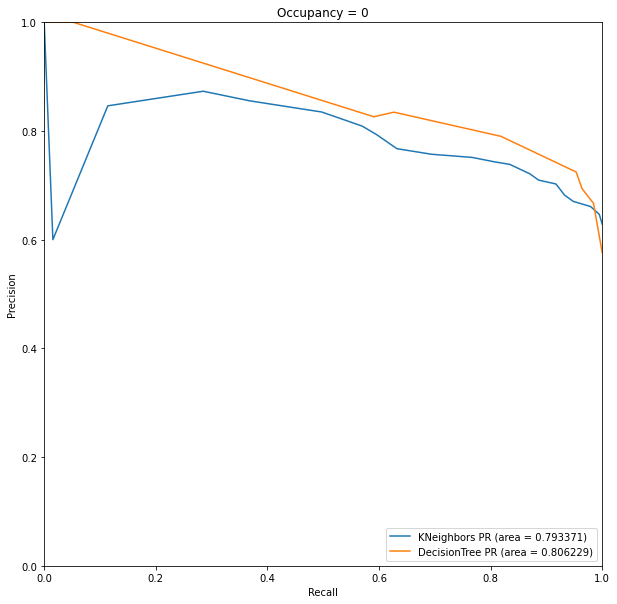

In [23]:
def PR(prob, occupancy, label, test):
    precision, recall, _ = precision_recall_curve(test, prob[:, occupancy])
    aps = average_precision_score(test, prob[:, occupancy])
    plt.plot(recall, precision, label='%s PR (area = %f)' % (label, aps))

plt.figure(figsize=(10,10))

PR(prob_knc, 0, 'KNeighbors', test_y_inversion)
PR(prob_dtc, 0, 'DecisionTree', test_y_inversion)

plt.xlabel('Recall')
plt.ylabel('Precision')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.title('Occupancy = 0')
plt.legend(loc=4, fontsize='medium')
plt.show()

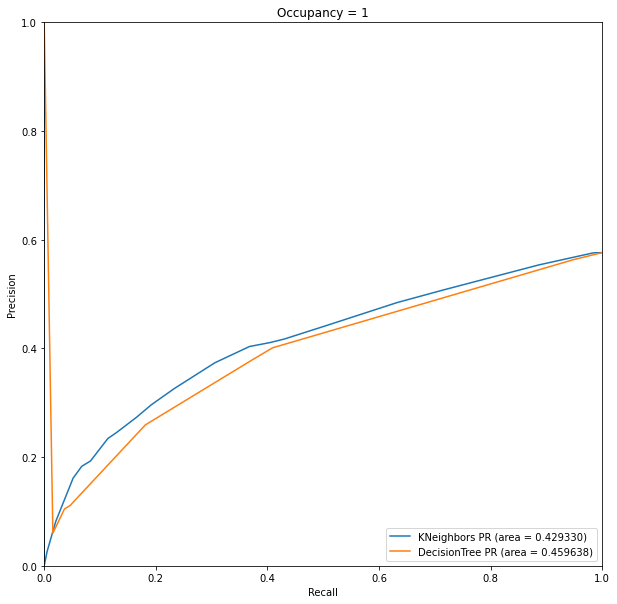

In [24]:
plt.figure(figsize=(10,10))

PR(prob_knc, 1, 'KNeighbors', test_y_inversion)
PR(prob_dtc, 1, 'DecisionTree', test_y_inversion)

plt.xlabel('Recall')
plt.ylabel('Precision')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.title('Occupancy = 1')
plt.legend(loc=4, fontsize='medium')
plt.show()

###### ROC

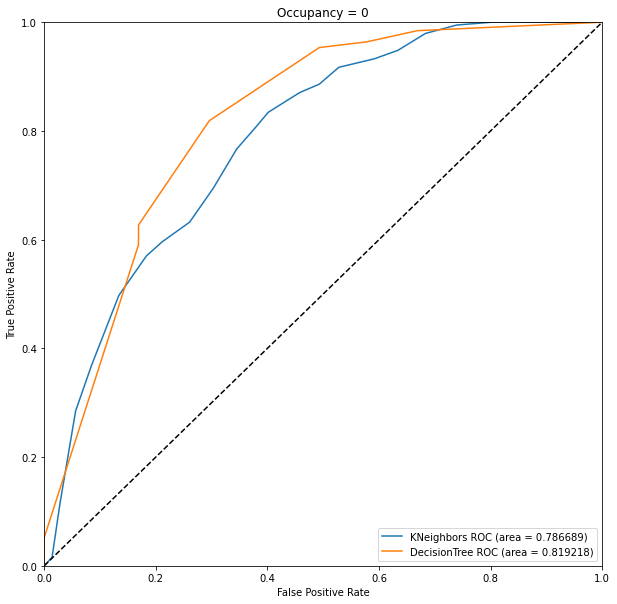

In [25]:
def ROC(prob, occupancy, label, test):
    tpr, fpr, _ = roc_curve(test, prob[:, occupancy])
    roc_auc  = auc(fpr, tpr)
    plt.plot(fpr, tpr, label='%s ROC (area = %f)' % (label, roc_auc))

plt.figure(figsize=(10,10))

ROC(prob_knc, 0, 'KNeighbors', test_y)
ROC(prob_dtc, 0, 'DecisionTree', test_y)

plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc=4, fontsize='medium')
plt.title('Occupancy = 0')
plt.show()

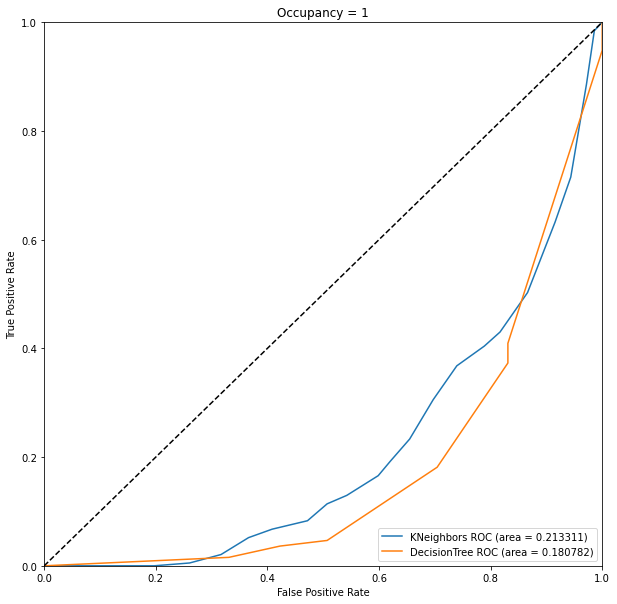

In [26]:
plt.figure(figsize=(10,10))

ROC(prob_knc, 1, 'KNeighbors', test_y)
ROC(prob_dtc, 1, 'DecisionTree', test_y)

plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc=4, fontsize='medium')
plt.title('Occupancy = 1')
plt.show()

Вывод:  
Оба классификатора показывают неплохие результаты, но логический лучше подходит к данной задаче